### SpaceX Falcon 9 Machine Learning Prediction

**Objectives**
Perform Exploratory Data Analysis (EDA) and determine training labels
- Create a column for the class
- Standardize the data
- Split into training and test data
- Find best Hyper parameter for SVM, Classification Trees, and Log Reg
- Find which method performs best using test data

In [1]:
%pip install numpy pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
# Func to plot a confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [4]:
# Load Data
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


**Task 1:** numpy array from col Class in data by applying method to_numpy() then assign to variable Y, make sure output is a Pandas series (only one bracket df['name of column'])

In [7]:
Y = data['Class'].to_numpy()
Y=pd.Series(Y)
type(Y)

pandas.core.series.Series

**Task 2:** Standardize the data in X then reassign it to the variable X using the transform

In [8]:
transform = preprocessing.StandardScaler()

**Task 3:** Split the data into training and test data using train_test_split. The training data is divided into validation data, a second set used for traiing data; then the models are trained and hyper paramters are selected using the function GridSearchCV

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
y_test.shape # 18 training examples

(18,)

**Task 4:** Create a logistic regression object then create a GridSearchCV object logreg_cv with cv=10. Fit the object to find the best parameters from the dictionary paramteres.

In [10]:
# Set parameters
parameters = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

# Set model object
lr = LogisticRegression()

# Find best hyper parameters with cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit
logreg_cv.fit(x_train, y_train)


/home/marv/Documents/datascience/learning/coursera-ibm-data-science/code/capston-spacex-launches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/marv/Documents/datascience/learning/coursera-ibm-data-science/code/capston-spacex-launches/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [11]:
# Show best hyper paramters and accuracy scroe
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


**Task 5:** Calculate the accuracy on the test data using method score

In [12]:
# Show score
logreg_score = logreg_cv.score(x_test, y_test)

0.8888888888888888

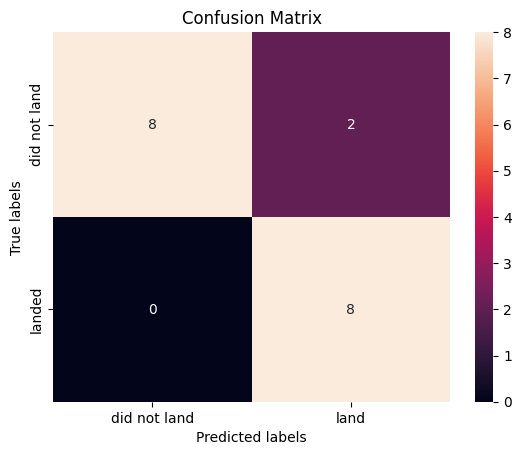

In [13]:
# Plot the confusion matrix
yhat=logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

**Task 6:** Create a support vector machine object then create a GridSearchCV object svm_cv with cv-10. Fit the object to find the best parameters from the dictionary parameters.

In [14]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [16]:
# Find best hyper parameters with cross-validation
grid_search = GridSearchCV(svm, parameters, cv=10)
svm_cv = grid_search.fit(x_train, y_train)

In [ ]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

**Task 7:** Calculate the accuracy

In [ ]:
svm_score = svm_cv.score(x_test, y_test)

In [ ]:
# Plot Confusion Matrix
yhat=svm_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

**Task 8:** Create a decision tree classifier object then create a GridSearchCV object three_cv with cv=10. Fit the object to find the best parameters from the dictionary parameters

In [ ]:
# Set parameters
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Set tree
tree = DecisionTreeClassifier()

In [ ]:
# Find hyper parameters
grid_search = GridSearchCV(tree, parameters, cv=10)

# Fit model
tree_cv = grid_search.fit(x_train,y_train)

In [ ]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

**Task 9:** Calc accuracy on the test data using the method score:

In [ ]:
tree_score = tree_cv.score(x_test, y_test)

In [ ]:
# Plot confusion matrix
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

**Task 10:** Create a k nearest neighbours object then create a GridSearchCV object knn_cv with cv=10. Fit the object to find the best parameters from the dict parameters

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
# Find best hyperparameters
grid_search = GridSearchCV(KNN, parameters, cv=10)

# Fit model
knn_cv = grid_search.fit(x_train, y_train)

In [ ]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

**Task 11:** Calculate the accuracy of knn_cv on test data using score

In [ ]:
knn_score = knn_cv.score(x_test,y_test)

In [ ]:
# Plot confusion matrix
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**Task 12:** Find the method that performs best

In [ ]:
model_scores = {"log_reg":logreg_score,"tree":tree_score,"knn":knn_score,"svm":svm_score}
max(model_scores, key=model_scores.get)

